In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import warnings
import matplotlib.cbook
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
warnings.filterwarnings("ignore",category=matplotlib.cbook.MatplotlibDeprecationWarning)

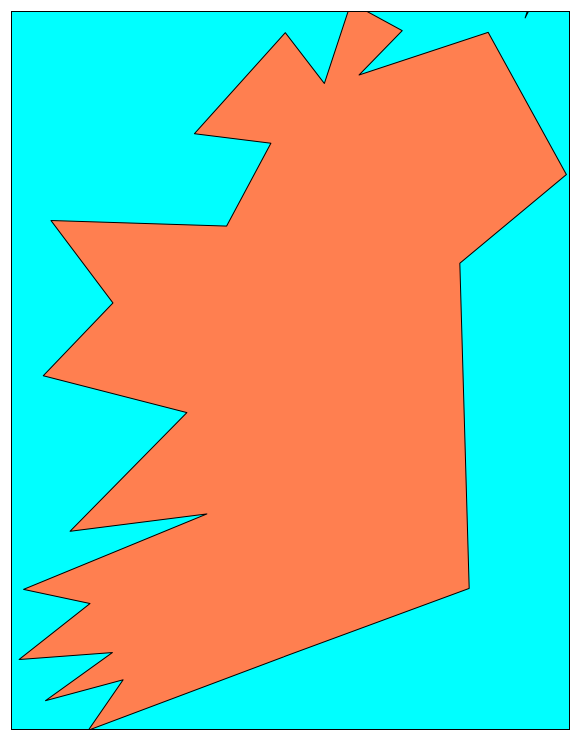

In [62]:
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='c', projection='merc', lat_0 = 54.5, lon_0 = -4.36,
            llcrnrlon = -10.48, llcrnrlat = 51.45,
            urcrnrlon = -5.41, urcrnrlat = 55.34)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
plt.show()

In [66]:
#Data Ceaning
rent_secondhand_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41g-price-sh-house-area-by_year_1.csv')
rent_house_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41e-price-new-house-area-by_year_1.csv')
rent_apartment_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41i-price-new-app-area-by_year_1.csv')
rent_house_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41e-price-new-house-area-by_year_1.csv')
rent_secondhand_data['type'] = 0
rent_apartment_data['type']= 1
rent_house_data['type'] = 2
rent_secondhand_data.columns
rent_house_data.columns
rent_apartment_data.columns
combine = pd.concat([rent_secondhand_data,rent_house_data,rent_apartment_data], ignore_index=True)
combine = combine.rename(columns={'Dublin ':'Dublin'})
combine = combine.rename(columns={'Other Areas':'Other'})
combine = combine.rename(columns={'National Average':'Average'})
combine['Galway'] = combine.Galway.str.replace('-', '0').astype(str)
combine['Limerick'] = combine.Limerick.str.replace('-', '0').astype(str)
combine['Waterford'] = combine.Waterford.str.replace('-', '0').astype(str)
columns = ['Average','Dublin','Cork','Galway','Limerick','Waterford','Other']
combine['Average'] = combine.Average.str.replace(',', '').astype(int)
combine['Dublin'] = combine.Dublin.str.replace(',', '').astype(int)
combine['Cork'] = combine.Cork.str.replace(',', '').astype(int)
combine['Galway'] = combine.Galway.str.replace(',', '').astype(int)
combine['Limerick'] = combine.Limerick.str.replace(',', '').astype(int)
combine['Other'] = combine.Other.str.replace(',', '').astype(int)
combine['Waterford'] = combine.Waterford.str.replace(',', '').astype(int)
combine[['Galway','Limerick','Waterford']] = combine[['Galway','Limerick','Waterford']].replace(0, np.NaN)
dummy = combine.fillna(combine.mean(), inplace=True)


In [68]:
new_data= combine.drop(['YEAR','Other','type','Average'],axis=1)
mean_price_counties = pd.DataFrame({'area' :new_data.columns,
                                    'mean' : new_data.mean()})

In [69]:
m.readshapefile('/Users/hithyshikrishnamurthy/Downloads/IRL_adm/IRL_adm1', 'areas')


(26,
 5,
 [-10.663054466247559, 51.41958236694347, 0.0, 0.0],
 [-5.993610858917208, 55.45041656494147, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x11e3c6a20>)

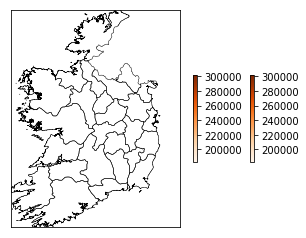

In [73]:
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['NAME_1'] for area in m.areas_info]
    })
df_poly = pd.merge(mean_price_counties, df_poly, how='left', on=['area']) 
#df_poly.merge(mean_price_counties, on=mean_price_counties.NAME_1, how='left')
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['mean'].fillna(0).values)))
ax.add_collection(pc)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(df_poly['mean'])
plt.colorbar(mapper, shrink=0.4)
plt.show()